In [31]:
import numpy as np
from numpy import ndarray

from typing import Callable, Dict, Tuple, List

np.set_printoptions(precision=4)
# GRAPHS_IMG_FILEPATH = "/Users/seth/development/01_deep-learning-from-scratch/images/02_fundamentals/graphs/"

In [32]:
%load_ext autoreload
%autoreload 2

In [33]:
TEST_ALL = False

# Boston data

In [34]:
import pandas as pd

In [35]:
# from sklearn.datasets import load_boston
boston = pd.read_csv("boston.csv", index_col=[0])

In [36]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [37]:
data = boston.drop(columns="Price").values
target = boston.Price.values
features = boston.columns.values

In [38]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

____

In [40]:
import numpy as np

In [41]:
def sigmoid(X):
    return 1/(1+(np.e**(-X)))

In [187]:
def deriv(func, a, delta_x=0.001):
    
    return (func(a+delta_x) - func(a-delta_x)) / (delta_x*2)

In [188]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-1.0 * x))

In [189]:
def backward(X, Y, params):
    
    assert X.shape[1] == params["W1"].shape[0]
    

    M1 = np.dot(X,params["W1"]) #(3x3) * (3x1) = (3x1)
    N1 = M1 + params["b1"] #(3x1) + (3x1) = (3x1)
    # O1 = sigmoid(N1) #apply non-linear function (3x1 shape remains equal)
    O1 = np.sqrt(N1)
    M2 = np.dot(O1,params["W2"]) #(3,1) * (1,1) = (3x1) same shape
    P = M2 + params["b2"] #(3x1) + (1,1) = (3x1 shape remains equal)
    # L = 1/2*((Y-P)**2) #1/2(((3x1)-(3x1))**2) = (3x1) same shape
    L = (1/X.shape[0])*(Y-P)
    
    # dL_dP = -(Y-P)
    dL_dP = (-2/X.shape[0])*(Y-P)

    dP_dM2, dP_db2 = np.ones_like(M2), np.ones_like(params["b2"])

    dL_dM2, dL_db2 = (dL_dP*dP_dM2), (dL_dP*dP_db2).sum(axis=0)

    dM2_dO1, dM2_dW2 = np.transpose(params["W2"], (1,0)), np.transpose(O1, (1,0))

    dL_dW2 = np.dot(dM2_dW2, (dL_dP*dP_dM2)) 

    dL_dO1 = np.dot(dL_dM2, dM2_dO1)

    # dO1_dN1 = (np.e**-N1)/(1+np.e**-N1)**2

    dO1_dN1 = sigmoid(N1) * (1-sigmoid(N1))
    dL_dN1 = (dL_dO1*dO1_dN1)

    dN1_dM1, dN1_db1 = np.ones_like(M1), np.ones_like(params["b1"])

    dL_db1 = (dL_dN1*dN1_db1).sum(axis=0)

    dL_dM1 = dL_dN1 * dN1_dM1

    dM1_dW1 = np.transpose(X, (1,0))

    dL_dW1 = np.dot(dM1_dW1, dL_dM1)
    
    gradients = {}

    gradients["b2"] = dL_db2
    gradients["W2"] = dL_dW2
    gradients["b1"] = dL_db1
    gradients["W1"] = dL_dW1    
    
    return gradients

In [190]:
def generate_batch(X, 
                   y,
                   start,
                   batch_size):

    if start+batch_size > X.shape[0]:
        batch_size = X.shape[0] - start
    
    X_batch, y_batch = X[start:start+batch_size], y[start:start+batch_size]
    
    return X_batch, y_batch

In [192]:
def forward(X, params):
    
    M1 = np.dot(X,params["W1"]) #(3x3) * (3x1) = (3x1)
    N1 = M1 + params["b1"] #(3x1) + (3x1) = (3x1)
    # O1 = sigmoid(N1) #apply non-linear function (3x1 shape remains equal)
    O1 = np.sqrt(np.abs(N1))
    M2 = np.dot(O1,params["W2"]) #(3,1) * (1,1) = (3x1) same shape
    P = M2 + params["b2"] #(3x1) + (1,1) = (3x1 shape remains equal)
    
    return P

In [193]:
def permute_data(X, Y):
    perm = np.random.permutation(X.shape[0])
    return X[perm], Y[perm]

In [194]:
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-1.0 * x))

In [195]:
def init_weights():
    
    params = {}

    params["W1"] = np.random.rand(13,13) #weight for each feature (3x1)
    params["b1"] = np.random.rand(1,13) #one value to add to X*W (1x1)
    params["W2"] = np.random.rand(13,1) #one weight for the (1x1) output of O1
    params["b2"] = np.random.rand(1,1) #another unique value to add to O1*W2
    
    return params

In [196]:
def train(X, Y, epochs, learning_rate, batch_size):
    
#     W1 = np.random.rand(X.shape[1],hidden_size) #weight for each feature (3x1)
#     b1 = np.random.rand(1,hidden_size) #one value to add to X*W (1x1)

#     W2 = np.random.rand(hidden_size,1) #one weight for the (1x1) output of O1
#     b2 = np.random.rand(1,1) #another unique value to add to O1*W2

    params = init_weights()

    gradients = backward(X, Y, params)

    # gradients.keys()

    losses = []
    
    for epoch in range(0, epochs):
    
        start = 0


        if start >= X.shape[0]:
            X, Y = permute_data(X, Y)
            start = 0

        # generate batch of data
        X_batch, Y_batch = generate_batch(X,Y, start=start,
                                          batch_size=batch_size)
        start += batch_size


        gradients = backward(X_batch, Y_batch, params)
        P_batch = forward(X_batch, params)

        # L = 1/2*((Y_batch-P_batch)**2) #1/2(((3x1)-(3x1))**2) = (3x1) same shape
        L =  np.mean(np.power(Y_batch - P_batch, 2))

        
        # print(L.mean())
        losses.append(L.mean())

        for param in gradients.keys():

            params[param] -= learning_rate*gradients[param]
    
    return params, losses

In [197]:
def predict(X, params):
    
    M1 = np.dot(X, params['W1'])

    N1 = M1 + params['b1']

    # O1 = sigmoid(N1)
    O1 = np.sqrt(np.abs(N1))
    
    
    M2 = np.dot(O1, params['W2'])

    P = M2 + params['b2']    
    
    return P
    

In [198]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

________

In [199]:
params, losses = train(X_train, y_train, 20000, 0.002, 23)

C:\Users\pablo\AppData\Local\Temp\ipykernel_10712\1715965596.py:9: RuntimeWarning: invalid value encountered in sqrt
  O1 = np.sqrt(N1)


In [200]:
preds = predict(X_test, params)

In [201]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: nan 
Root mean squared error: nan


In [202]:
print("Mean absolute error:", round(mae(preds, y_test), 4), "\n"
      "Root mean squared error:", round(rmse(preds, y_test), 4))

Mean absolute error: nan 
Root mean squared error: nan


In [203]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

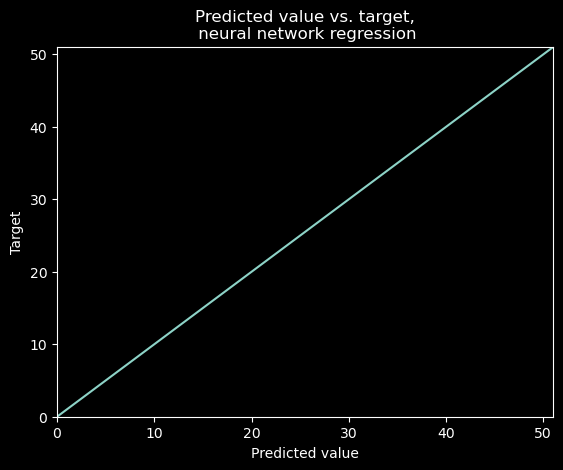

In [204]:
plt.xlabel("Predicted value")
plt.ylabel("Target")
plt.title("Predicted value vs. target,\n neural network regression")
plt.xlim([0, 51])
plt.ylim([0, 51])
plt.scatter(preds, y_test)
plt.plot([0, 51], [0, 51]);
# plt.savefig(GRAPHS_IMG_FILEPATH + "07_neural_network_regression_preds_vs_target.png");

In [205]:
np.round(np.mean(np.array(np.abs(preds - y_test))), 4)

nan

In [206]:
np.round(np.mean(np.array(np.power(preds - y_test, 2))), 4)

nan

## Theoretical relationship between most important feature and target

In [207]:
NUM = 40
a = np.repeat(X_test[:,:-1].mean(axis=0, keepdims=True), NUM, axis=0)
b = np.linspace(-1.5, 3.5, NUM).reshape(NUM, 1)
test_feature = np.concatenate([a, b], axis=1)
preds_test = predict(test_feature, params)[:, 0]

In [208]:
# modifyed_v = params.copy()
# b1_values = np.arange(-20, 20, 1)
# b2_values = np.arange(-20,20, 1)

# errors = []


# for i in range(len(W1_values)):
    
#     new_params = modifyed_v
#     new_params["b1"] = b1_values[i]
#     new_params["b2"] = b2_values[i]
    
#     preds = (forward(X_train,
#             new_params))
    
#     current_loss = (1/2*((y_train-preds)**2))
    
#     errors.append(current_loss.mean())





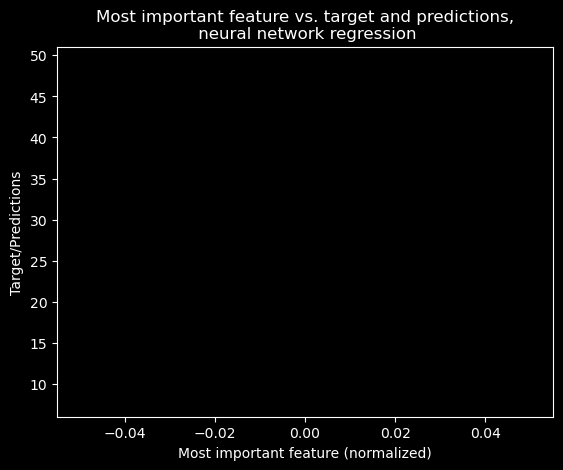

In [209]:
plt.scatter(X_test[:, 12], preds)
plt.plot(np.array(test_feature[:, -1]), preds_test, linewidth=2, c='orange')
plt.ylim([6, 51])
plt.xlabel("Most important feature (normalized)")
plt.ylabel("Target/Predictions")
plt.title("Most important feature vs. target and predictions,\n neural network regression");
# plt.savefig(GRAPHS_IMG_FILEPATH + "08_neural_network_regression_impt_feat_vs_preds.png")